In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

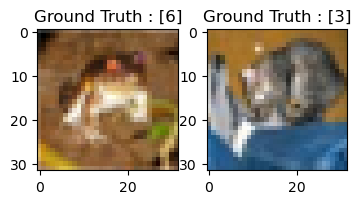

In [3]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [4]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [5]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [12]:
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [18]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 16)        2320      
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 16)        2320      
                                                      

In [14]:
history = model1.fit(
    train_data
    , train_labels_one_hot
    , batch_size=batch_size
    , epochs=epochs
    , verbose=1
)
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
196/196 [==============================] - 12s 52ms/step - loss: 1.8607 - accuracy: 0.3110
Epoch 2/20
196/196 [==============================] - 11s 54ms/step - loss: 1.5283 - accuracy: 0.4429
Epoch 3/20
196/196 [==============================] - 10s 53ms/step - loss: 1.4001 - accuracy: 0.4911
Epoch 4/20
196/196 [==============================] - 10s 52ms/step - loss: 1.3228 - accuracy: 0.5239
Epoch 5/20
196/196 [==============================] - 10s 50ms/step - loss: 1.2631 - accuracy: 0.5470
Epoch 6/20
196/196 [==============================] - 10s 50ms/step - loss: 1.2021 - accuracy: 0.5675
Epoch 7/20
196/196 [==============================] - 10s 51ms/step - loss: 1.1542 - accuracy: 0.5863
Epoch 8/20
196/196 [==============================] - 11s 56ms/step - loss: 1.1131 - accuracy: 0.6036
Epoch 9/20
196/196 [==============================] - 10s 50ms/step - loss: 1.0781 - accuracy: 0.6152
Epoch 10/20
196/196 [==============================] - 11s 53ms/step - loss: 1.043

[0.818400502204895, 0.70660001039505]

Text(0.5, 1.0, 'Accuracy Curves')

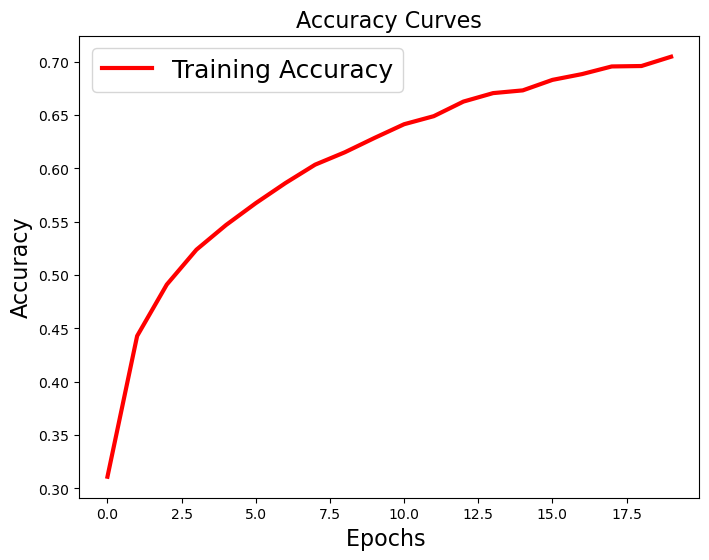

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [16]:
predictions = model1.predict(test_data)

313/313 [==============================] - 2s 5ms/step


0 - Avion  
1 - Carros  
2 - Pajaro  
3 - Gatos  
4 - Venado  
5 - Perros  
6 - Ranas  
7 - Caballos  
8 - Botes  
9 - Camiones  

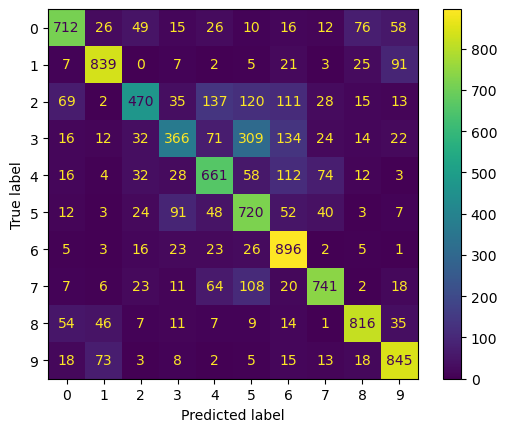

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))

ConfusionMatrixDisplay(cm).plot()

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing

# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar las imágenes en un rango de 0 a 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Aumento de datos para mejorar la robustez del modelo
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

# Construir el modelo con capas adicionales y optimizaciones
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test accuracy: {test_acc}")


c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.2483 - loss: 2.2024 - val_accuracy: 0.4043 - val_loss: 1.6512
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.3880 - loss: 1.6750 - val_accuracy: 0.3815 - val_loss: 1.8820
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4386 - loss: 1.5610 - val_accuracy: 0.4837 - val_loss: 1.4469
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4676 - loss: 1.4939 - val_accuracy: 0.5602 - val_loss: 1.2429
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4837 - loss: 1.4466 - val_accuracy: 0.5225 - val_loss: 1.3559
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5008 - loss: 1.4056 - val_accuracy: 0.5801 - val_loss: 1.1882
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5133 - loss: 1.3691 - val_accuracy: 0.6243 - val_loss: 1.0561
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5267 -